In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

In [8]:
boston = fetch_openml(name="boston", version=1, as_frame=True)

In [6]:
df = boston.frame

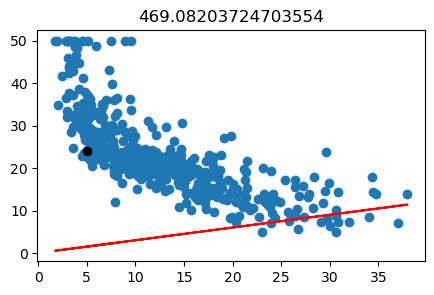

In [25]:
plt.figure(figsize=(5, 3))
plt.scatter(df['LSTAT'], df['MEDV'])
#x_1 = np.linspace(df['LSTAT'].min(), df["LSTAT"].max())
x_1 = df["LSTAT"]
x_b = np.zeros_like(x_1)
x = np.vstack([x_1,x_b]).T
w = np.array([0.3,1])
y_pred = neuron2(x, w)
error = (df["MEDV"].values - y_pred)
mse = np.mean(error**2)
plt.title(mse)
plt.plot(x_1,y_pred, c='r')
plt.scatter(df['LSTAT'][0], df['MEDV'][0], color="black")

In [38]:
def correct_weights(x_n, y_n, w):
    w_0 = (y_n + w[1])/x_n
    w_1 = w_0*x_n-y_n
    return w_0, w_1

In [39]:
w_0, w_1 = correct_weights(x_0, y_0, w)

In [40]:
w_0, w_1

(5.02008032128514, 1.0)

In [75]:
w = np.array([5.02,1])

[0.03121321 0.00125   ]


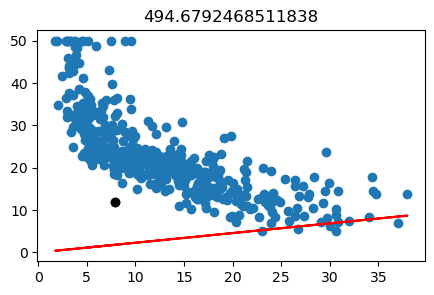

In [79]:
plt.figure(figsize=(5, 3))
plt.scatter(df['LSTAT'], df['MEDV'])
#x_1 = np.linspace(df['LSTAT'].min(), df["LSTAT"].max())
x_1 = df["LSTAT"]
x_b = np.zeros_like(x_1)
x = np.vstack([x_1,x_b]).T

difference = 0

for i in range(len(x_1)):
    x_n, y_n = df['LSTAT'][i], df['MEDV'][i]
    alpha = 0.01
    difference += alpha*np.array(correct_weights(x_n, y_n, w))
    change = difference/len(x_1)

w -= change
print(change)

y_pred = neuron2(x, w)
error = (df["MEDV"].values - y_pred)
mse = np.mean(error**2)
plt.title(mse)
plt.plot(x_1,y_pred, c='r')
plt.scatter(x_n, y_n, color="black")

In [84]:
w = np.array([0.22925899, 0.12375   ])

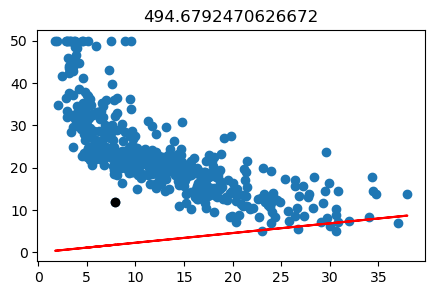

In [86]:
plt.figure(figsize=(5, 3))
plt.scatter(df['LSTAT'], df['MEDV'])
#x_1 = np.linspace(df['LSTAT'].min(), df["LSTAT"].max())
x_1 = df["LSTAT"]
x_b = np.zeros_like(x_1)
x = np.vstack([x_1,x_b]).T

y_pred = neuron2(x, w)
y_actual = df["MEDV"]
mse_val = mse(y_actual, y_pred)
plt.title(mse_val)
plt.plot(x_1,y_pred, c='r')
plt.scatter(x_n, y_n, color="black")

In [87]:
def mse(y_actual, y_predicted):
    return np.mean((y_actual - y_predicted)**2)

In [88]:
def l_mse(X,y, w):
    y_pred = neuron2(X,w)
    return mse(y, y_pre

In [91]:
w2 = np.array([0.22925899, 1.12375   ])
w3 = np.array([3.22925899, 0.12375   ])


w2_loss = l_mse(X_train, y_train, w2)
print(f"Model 1 (w=[-0.6, 30]) Loss: {w2_loss:.2f}")

w3_loss = l_mse(X_train, y_train, w3)
print(f"Model 2 (w=[-0.8, 30]) Loss: {w3_loss:.2f}")

Model 1 (w=[-0.6, 30]) Loss: 451.82
Model 2 (w=[-0.8, 30]) Loss: 1267.87


In [102]:
def mse_gradient(X,y,w):
    y_pred = neuron2(X,w)
    gradient = -(2/len(y)) * X.T @ (y - y_pred)
    return gradient

In [103]:
mse_gradient(X_train, y_train, w2)

array([-348.33216531,  -37.01645565])

In [104]:
mse_gradient(X_train, y_train, w3)

array([892.32564062,  36.9019238 ])

[4.19442577 6.12004835] 2780.4346008831653
[4.15959256 6.11634671] 2729.3484622980504
[4.12475934 6.11264506] 2678.7808974398126
[4.08992612 6.10894342] 2628.731906308451
[4.05509291 6.10524177] 2579.2014889039665
[4.02025969 6.10154013] 2530.1896452263572
[3.98542647 6.09783848] 2481.696375275626
[3.95059326 6.09413684] 2433.7216790517696
[3.91576004 6.09043519] 2386.2655565547902
[3.88092682 6.08673354] 2339.328007784688
[3.84609361 6.0830319 ] 2292.909032741461
[3.81126039 6.07933025] 2247.0086314251116
[3.77642718 6.07562861] 2201.626803835638
[3.74159396 6.07192696] 2156.7635499730413
[3.70676074 6.06822532] 2112.4188698373205
[3.67192753 6.06452367] 2068.5927634284762
[3.63709431 6.06082203] 2025.2852307465093
[3.60226109 6.05712038] 1982.4962717914177
[3.56742788 6.05341873] 1940.2258865632032
[3.53259466 6.04971709] 1898.474075061865
[3.49776144 6.04601544] 1857.240837287403
[3.46292823 6.0423138 ] 1816.5261732398178
[3.42809501 6.03861215] 1776.3300829191087
[3.39326179 6.0349

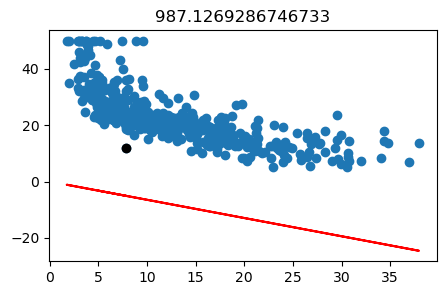

In [131]:
plt.figure(figsize=(5, 3))
w = np.array([4.22925899, 6.12375   ])
plt.scatter(df['LSTAT'], df['MEDV'])
#x_1 = np.linspace(df['LSTAT'].min(), df["LSTAT"].max())
X_train = np.column_stack([df['LSTAT'], np.ones(len(df))])
y_train = df['MEDV'].values

iterations = 140
learning_rate = 0.0001
for _ in range(iterations):
    gradient = mse_gradient(X_train, y_train, w)
    loss = l_mse(X_train, y_train, w)
    w = w - learning_rate * grad
    print(w, loss)
    
    
y_pred = neuron2(x, w)
y_actual = df["MEDV"]
mse_val = mse(y_actual, y_pred)
plt.title(mse_val)
plt.plot(x_1,y_pred, c='r')
plt.scatter(x_n, y_n, color="black")